<a href="https://colab.research.google.com/github/abubakarkhanlakhwera/Deepl-Learing/blob/main/Backpropagation_In_terms_of_regression/Backpropagation_In_terms_of_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Without Keras **

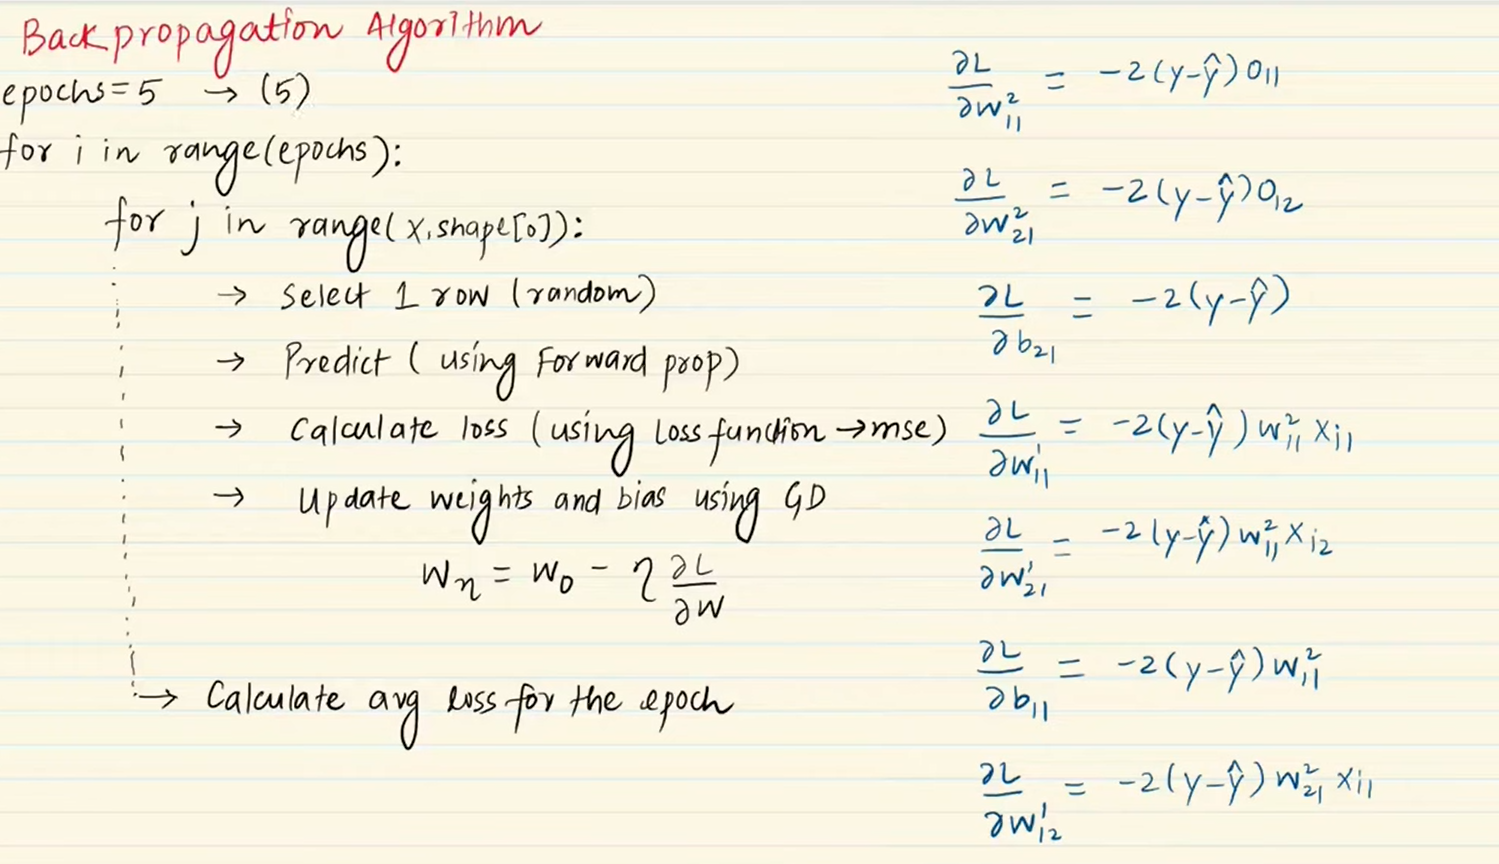

In [39]:
 import numpy as np
 import pandas as pd

In [40]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa','profile_score','lpa'])

In [41]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [42]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1,L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1],layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

  return parameters

In [43]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [44]:
def linear_forward(A_prev,W,b):

  Z = np.dot(W.T,A_prev) + b

  return Z

In [45]:
def L_layer_forward(X,parameters):

  A = X
  L = len(parameters) // 2
  for l in range(1,L+1):
    A_prev = A
    W1 = parameters['W' + str(l)]
    b1 = parameters['b' + str(l)]
    print("A"+str(1)+":",A_prev)
    print("W"+str(l)+":",W1)
    print("b"+str(l)+":",b1)
    print("--"*20)

    A = linear_forward(A_prev,W1,b1)
    print('A'+str(l)+':',A)
    print('**'*20)

  return A,A_prev

In [46]:
X = df[['cgpa','profile_score']].values[0].reshape(2,1)
y = df[['lpa']].values[0][0]
parameters = initialize_parameters([2,2,1])
y_hat,A1 = L_layer_forward(X,parameters)

A1: [[8]
 [8]]
W1: [[0.1 0.1]
 [0.1 0.1]]
b1: [[0.]
 [0.]]
----------------------------------------
A1: [[1.6]
 [1.6]]
****************************************
A1: [[1.6]
 [1.6]]
W2: [[0.1]
 [0.1]]
b2: [[0.]]
----------------------------------------
A2: [[0.32]]
****************************************


In [47]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  # The following line is modified to use index 0 for b2
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]) #Changed index from 1 to 0 for parameters['b2'] as it was out of bounds

In [48]:
X = df[['cgpa','profile_score']].values[3].reshape(2,1)
y = df[['lpa']].values[0][0]

In [49]:
y_hat

array([[0.32]])

In [50]:
A1

array([[1.6],
       [1.6]])

In [51]:
update_parameters(parameters,y,y_hat,A1,X)

<ipython-input-47-2f5aa151ff0e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
<ipython-input-47-2f5aa151ff0e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
<ipython-input-47-2f5aa151ff0e>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001

In [52]:
parameters


{'W1': array([[0.10411336, 0.10987206],
        [0.10411336, 0.10987206]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.11259867]])}

In [54]:
parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):
 loss = []
 #The for loop was indented by one extra space, removing that space fixes the error.
 for j in range(df.shape[0]):
  X = df[['cgpa','profile_score']].values[j].reshape(2,1)
  y = df[['lpa']].values[j][0]

  y_hat,A1 = L_layer_forward(X,parameters)
  update_parameters(parameters,y,y_hat,A1,X)
  loss.append((y-y_hat)**2)

 print('Epoch - ',i+1,'Loss - ',np.array(loss).mean())

parameters

A1: [[8]
 [8]]
W1: [[0.1 0.1]
 [0.1 0.1]]
b1: [[0.]
 [0.]]
----------------------------------------
A1: [[1.6]
 [1.6]]
****************************************
A1: [[1.6]
 [1.6]]
W2: [[0.1]
 [0.1]]
b2: [[0.]]
----------------------------------------
A2: [[0.32]]
****************************************
A1: [[7]
 [9]]
W1: [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1: [[0.]
 [0.]]
----------------------------------------
A1: [[1.70530193]
 [1.70530193]]
****************************************
A1: [[1.70530193]
 [1.70530193]]
W2: [[0.111776]
 [0.111776]]
b2: [[0.11259867]]
----------------------------------------
A2: [[0.49382233]]
****************************************
A1: [[ 6]
 [10]]
W1: [[0.11460249 0.11689424]
 [0.11460249 0.11689424]]
b1: [[0.]
 [0.]]
----------------------------------------
A1: [[1.83363982]
 [1.87030779]]
****************************************
A1: [[1.83363982]
 [1.87030779]]
W2: [[0.12714479]
 [0.12714479]]
b2: [[0.12829066]]
-----------------------

<ipython-input-47-2f5aa151ff0e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
<ipython-input-47-2f5aa151ff0e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
<ipython-input-47-2f5aa151ff0e>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001

{'W1': array([[0.28446253, 0.42080903],
        [0.270631  , 0.39499731]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.49320003],
        [0.4189969 ]]),
 'b2': array([[0.42054933]])}

# **With Keras**

In [55]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [56]:
model = Sequential()

model.add(Dense(2,activation='linear',input_dim=2))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.get_weights(

)

[array([[ 0.61606133,  0.6460923 ],
        [ 0.83253706, -0.71327287]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1906632],
        [0.9417919]], dtype=float32),
 array([0.], dtype=float32)]

In [59]:
new_weights = [np.array([[0.1,0.1],[0.1,0.1]],dtype=np.float32),
               np.array([0.,0.],dtype=np.float32),
               np.array([[0.1],[0.1]],dtype=np.float32),
               np.array([0.],dtype=np.float32)]

In [60]:
model.set_weights(new_weights)

In [61]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [62]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [63]:
model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=75,verbose=1,batch_size=1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21.8928
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.6394  
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.8186 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6582 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.1817  
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9807  
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.4241 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.0447 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.2216 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3051 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.8060 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7078 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.0906 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5569 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.6335 
Epoch 16/75
4/4 ━

In [65]:
model.get_weights()

[array([[0.3735385, 0.3735385],
        [0.3658165, 0.3658165]], dtype=float32),
 array([0.2723726, 0.2723726], dtype=float32),
 array([[0.3729985],
        [0.3729985]], dtype=float32),
 array([0.2049845], dtype=float32)]